
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [3]:
import pandas as pd

data_input = pd.read_csv('datasets/Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


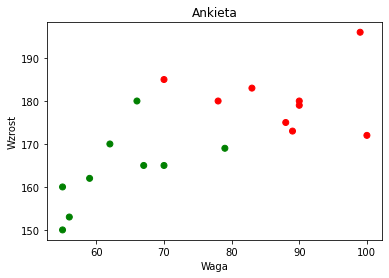

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

<ipython-input-5-09f62b60a45a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_input.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E1F129FD0>,
      dtype=object)

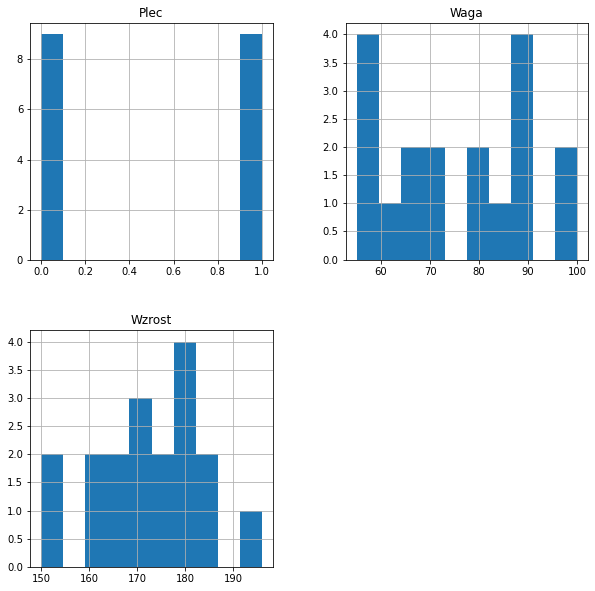

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

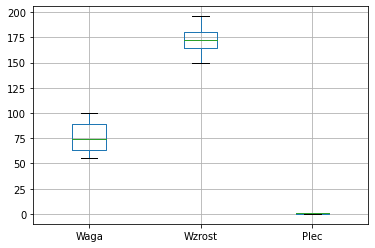

In [6]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

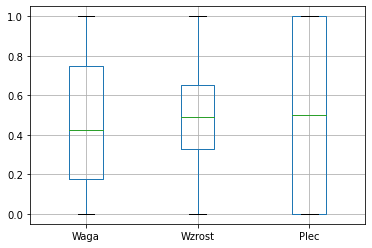

In [7]:
    import numpy as np

    def Average(lst):  
        return sum(lst) / len(lst) 
    
    def normalize_data(v):
        normx = (v - v.min()) / (v.max() - v.min())
        return normx
    
    normalized_data_input = data_input.copy()
    normalized_data_input['Waga'] = normalize_data(data_input['Waga'])
    normalized_data_input['Wzrost'] = normalize_data(data_input['Wzrost'])
    
    normalized_data_input.boxplot()

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [8]:
from sklearn.model_selection import train_test_split

test_input, train_input = train_test_split(data_input, test_size=0.2)
norm_test_input, norm_train_input = train_test_split(normalized_data_input, test_size=0.2)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [11]:
import sklearn.svm as svm
import pandas as pd
import numpy as np

trn_inp = train_input.iloc[:,:2]
trn_out = train_input.iloc[:,2:]

trained_clf = svm.LinearSVC(C=1.0, max_iter=30000).fit(trn_inp, trn_out.values.ravel())

#test dla danych nieznormalizowanych
test_input, train_input = train_test_split(data_input, test_size=0.2)
tst_inp = test_input.iloc[:,:2]
tst_out = test_input.iloc[:,2:].values.ravel()
        
print("Wynik dla danych nieznormalizowanych: ",trained_clf.score(tst_inp,tst_out))

Wynik dla danych nieznormalizowanych:  0.8571428571428571


D:\Programy\conda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np

norm_trn_inp = norm_train_input.iloc[:,:2]
norm_trn_out = norm_train_input.iloc[:,2:]

norm_trained_clf = svm.LinearSVC(C=1.0, max_iter=30000).fit(norm_trn_inp, norm_trn_out.values.ravel())

#test dla danych znormalizowanych
norm_test_input, norm_train_input = train_test_split(normalized_data_input, test_size=0.2)
norm_tst_inp = norm_test_input.iloc[:,:2]
norm_tst_out = norm_test_input.iloc[:,2:].values.ravel()

print("Wynik dla danych znormalizowanych: ",norm_trained_clf.score(norm_tst_inp,norm_tst_out))

Wynik dla danych znormalizowanych:  0.9285714285714286


    Analizując wyniki można zauważyć, że zazwyczaj skuteczność klasyfikatora dla danych znormalizowanych jest znacząco większa od tej dla danych nieznormalizowanych.

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

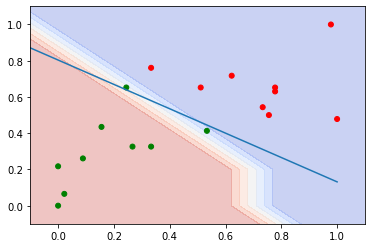

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(norm_trn_inp, norm_trn_out.values.ravel())

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = normalized_data_input.iloc[:, 0].min() - 1, normalized_data_input.iloc[:, 0].max() + 1
y_min, y_max = normalized_data_input.iloc[:, 1].min() - 1, normalized_data_input.iloc[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(normalized_data_input.iloc[:, 0], normalized_data_input.iloc[:, 1], c=x, cmap=colors.ListedColormap(['red', 'green']), s=25)
l, = ax.plot(xx,yy)

ax.axis([-0.1, 1.1,-0.1, 1.1])


def animate(i):
    c = i+1/10
    clf2 = svm.LinearSVC(C=c).fit(norm_trn_inp, norm_trn_out.values.ravel())

    # get the separating hyperplane
    w = clf2.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-1, 1)
    yy = a * xx - (clf2.intercept_[0]) / w[1]
    l.set_xdata(xx)
    l.set_ydata(yy)
    return (l,)

def initAnim():
    l.set_data([],[])
    return l,

ani = FuncAnimation(fig, animate, frames=9, init_func=initAnim,
                                     interval=500, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())

    Animacja pokazuje jak wraz ze wzrostem parametru C, wzrasta również dopasowanie klasyfikatora do zbioru danych, ale od pewnego stopnia parametru C, dopasowanie do konturu zanika.

## Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

In [14]:
import pandas as pd

data_input = pd.read_csv('datasets/bcancer.csv',
                        usecols=["Glucose","Age","Classification"])

data_input.head()

,Age,Glucose,Classification
0,48,70,1
1,83,92,1
2,82,91,1
3,68,77,1
4,86,92,1


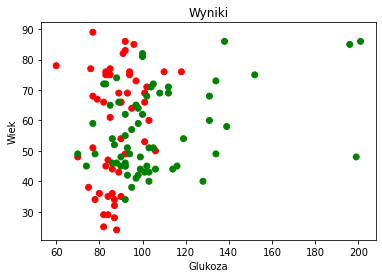

In [15]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Classification'].map(lambda x: 1 if x == 2 else 0)
y = data_input['Glucose']
z = data_input['Age']

data_input['Classification'] = data_input['Classification'].map(lambda x: 1 if x == 2 else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Glukoza')
plt.ylabel('Wiek')
plt.title('Wyniki')
plt.show()

<ipython-input-17-09f62b60a45a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_input.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E21A421F0>,
      dtype=object)

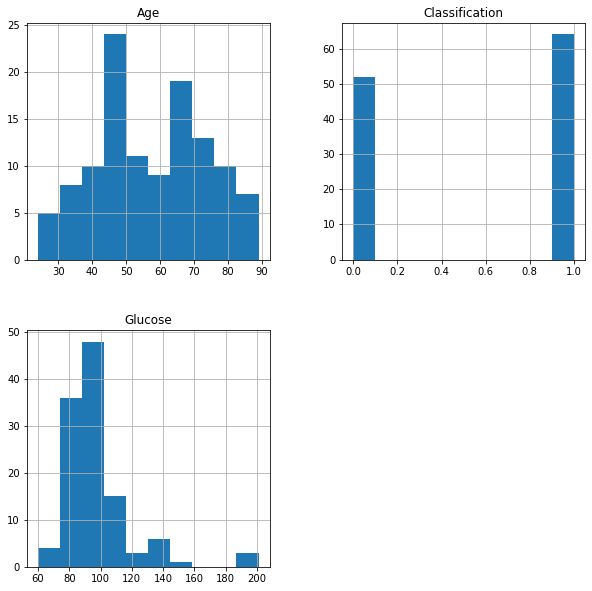

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

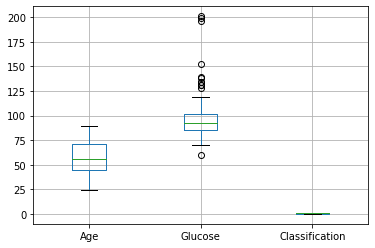

In [18]:
data_input.boxplot()

## Zadanie 6

Proszę dokonać standaryzacji danych

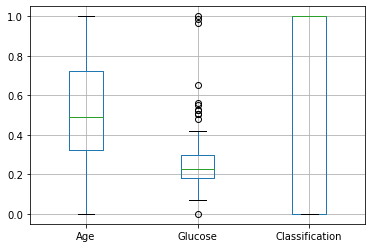

In [20]:
    import numpy as np

    def Average(lst):  
        return sum(lst) / len(lst) 
    
    def normalize_data(v):
        normx = (v - v.min()) / (v.max() - v.min())
        return normx
    
    normalized_data_input = data_input.copy()
    normalized_data_input['Glucose'] = normalize_data(data_input['Glucose'])
    normalized_data_input['Age'] = normalize_data(data_input['Age'])
    
    normalized_data_input.boxplot()

## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [35]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np


def find_best(k, g, norm_train_input):
    results = []
    norm_trn_inp = norm_train_input.iloc[:,:2]
    norm_trn_out = norm_train_input.iloc[:,2:]
    for i in range(0,99):
        c = (i+1)
        norm_trained_clf = svm.SVC(C=c, kernel=k, gamma=g, max_iter=30000).fit(norm_trn_inp, norm_trn_out.values.ravel())

        #test dla danych znormalizowanych
        norm_test_input, norm_train_input = train_test_split(normalized_data_input, test_size=0.2)
        norm_tst_inp = norm_test_input.iloc[:,:2]
        norm_tst_out = norm_test_input.iloc[:,2:].values.ravel()
        results.append(norm_trained_clf.score(norm_tst_inp,norm_tst_out))
    return(results)

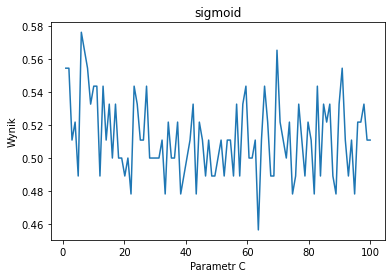

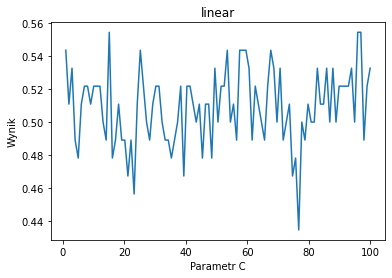

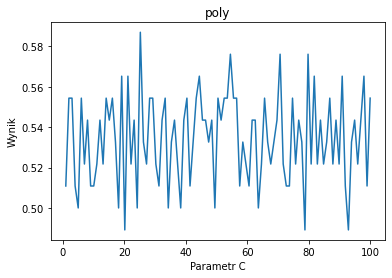

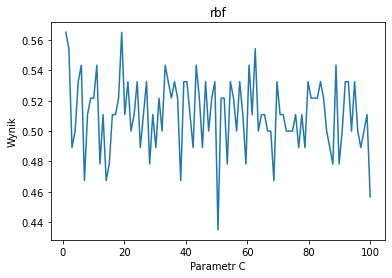

In [36]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import svm

np.random.seed(0)
X = np.linspace(1, 100.0, num=99)
Y = find_best('sigmoid',0.1, norm_train_input)
fig, ax = plt.subplots()
plt.xlabel('Parametr C')
plt.ylabel('Wynik')
plt.title('sigmoid')

ax.plot(X,Y)
plt.show()

Y = find_best('linear','auto', norm_train_input)
fig, ax = plt.subplots()
plt.xlabel('Parametr C')
plt.ylabel('Wynik')
plt.title('linear')

ax.plot(X,Y)
plt.show()

Y = find_best('poly',0.8, norm_train_input)
fig, ax = plt.subplots()
plt.xlabel('Parametr C')
plt.ylabel('Wynik')
plt.title('poly')

ax.plot(X,Y)
plt.show()

Y = find_best('rbf','auto', norm_train_input)
fig, ax = plt.subplots()
plt.xlabel('Parametr C')
plt.ylabel('Wynik')
plt.title('rbf')

ax.plot(X,Y)
plt.show()

    Analizując wyniki trenowania modeli SVC w zależności od ustawień parametru C, kernela i gammy, można stwierdzić że najlepsze wyniki osiąga kernel sigmoidalny, z parametrem C na poziomie równym 0.5. Gamma nie miała znacznego wpływu na wyniki poszczególnych kerneli. Najgorsze wyniki osiągał kernel rbf.

## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[ 7  5]
 [ 6 11]]
Normalized confusion matrix
[[0.58 0.42]
 [0.35 0.65]]


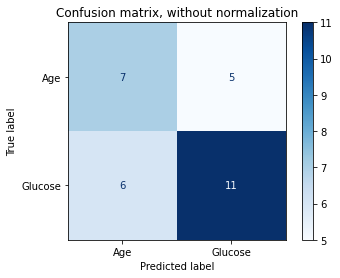

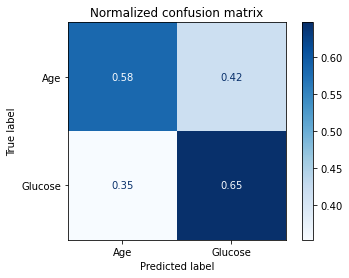

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = data_input.iloc[:,:2]
y = data_input.iloc[:,2:].values.ravel()
class_names = ['Age','Glucose','Classification']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()